### should know before the type of problem (i.e classification or regression or any other kind)

In [22]:
# importing libraries
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sb
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn

### classification goal is to predict wheather the patient has 10-year rish of future coronary heart disease (CHD). 

further, we are loading the dataset


In [5]:
# dataset
disease_df = pd.read_csv("E:\machine learning projects\heart disease detection\heart.csv")
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
print (disease_df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [7]:
print (disease_df.tail())

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  


In [11]:
# checking data for basic statistical measures
disease_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [12]:
# checking number of null values
disease_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
# using list comprehension in stead of 'for' loop as described below
[disease_df[col].fillna(df_disease[col].mean(), inplace=True) if disease_df[col].isnull().sum() > 0 else None for col in disease_df.columns]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [17]:
# Let’s impute the missing values by means as the data present in the different columns are continuous values.

# we used .fillna method to this as well

for col in disease_df.columns:
    if disease_df[col].isnull().sum() > 0:
       disease_df[col] = disease_df[col].fillna(disesae_df[col].mean())

disease_df.isnull().sum().sum()



0

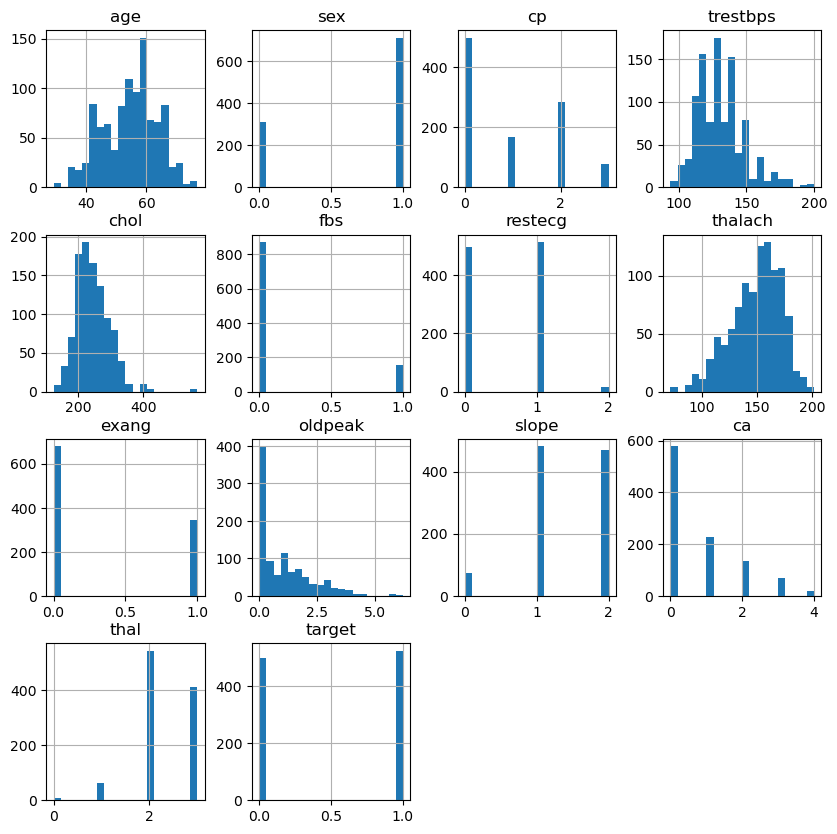

In [18]:
# Let’s draw the histogram to visualise the distribution of the data with continuous values in the columns of the dataset.

disease_df.hist(bins=20, figsize=(10, 10))
plt.show()

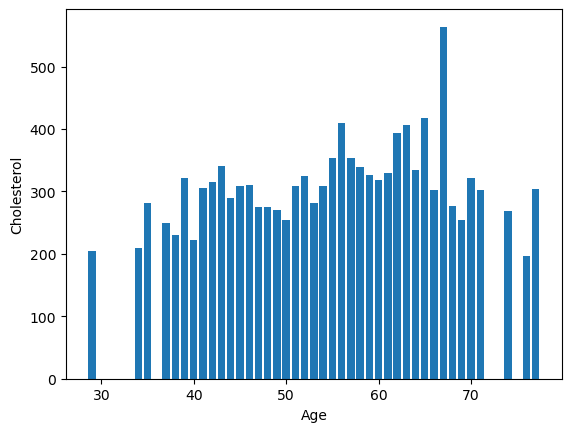

In [20]:
# comparing two variables and plotting the result on x-axis and y-axis

plt.bar(disease_df['age'], disease_df['chol'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

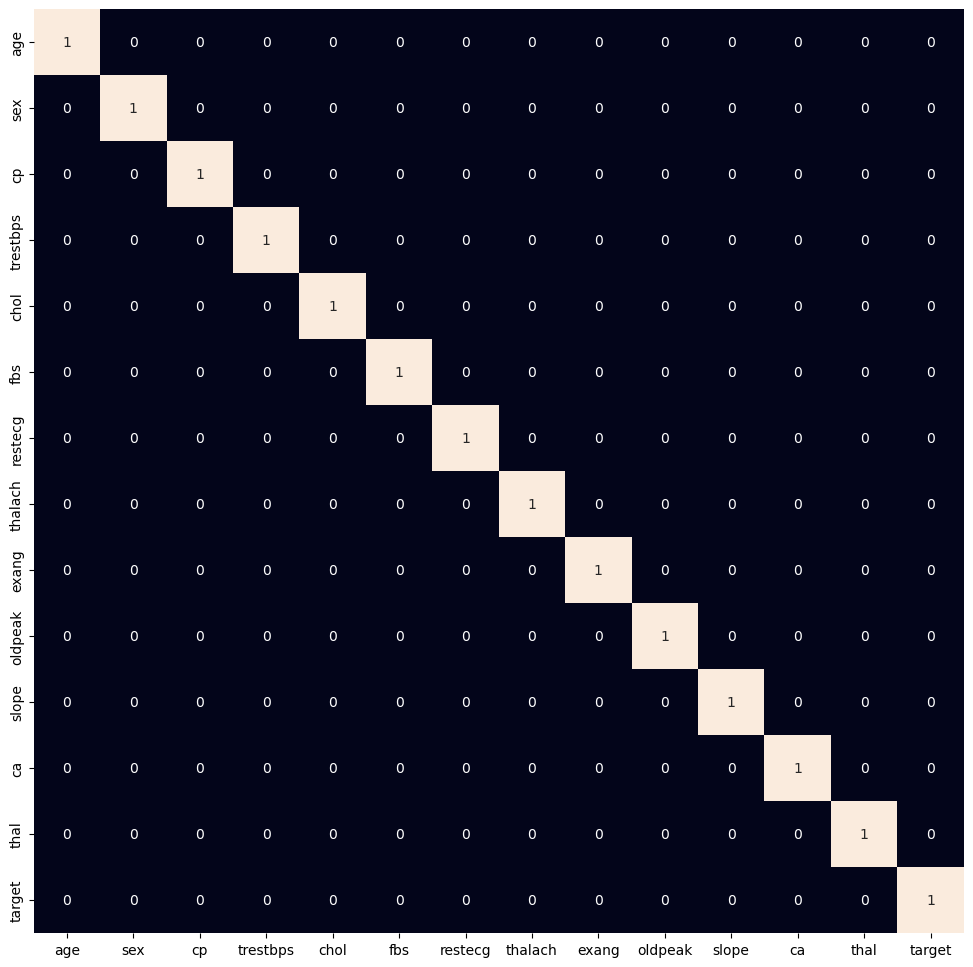

In [25]:
# removing the redundant features as they won't help to improve the performance of a model (# coorelation heat map )
# link- https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
plt.figure(figsize=(12, 12))
sb.heatmap(disease_df.corr() > 0.5, annot=True, cbar=False)
plt.show()

In [ ]:
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)

# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

### learned to drop the column, rename it, removing NAN/nulll values (if any) and know the tolal values in data (columns, elements) 

In [29]:
# dataset
disease_df.drop(['fbs'], inplace = True, axis = 1)
disease_df.rename(columns ={'ca':'Calcium'}, inplace = True)
 
# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
# print(disease_df.Cholestrol.value_counts())  #absoulement à voir (pourquoi ça a pas marché)

   age  sex  cp  trestbps  chol  restecg  thalach  oldpeak  slope  Calcium  \
0   52    1   0       125   212        1      168      1.0      2        2   
1   53    1   0       140   203        0      155      3.1      0        0   
2   70    1   0       145   174        1      125      2.6      0        0   
3   61    1   0       148   203        1      161      0.0      2        1   
4   62    0   0       138   294        1      106      1.9      1        3   

   thal  target  
0     3       0  
1     3       0  
2     3       0  
3     3       0  
4     2       0   (1025, 12)


AttributeError: 'DataFrame' object has no attribute 'Cholestrol'

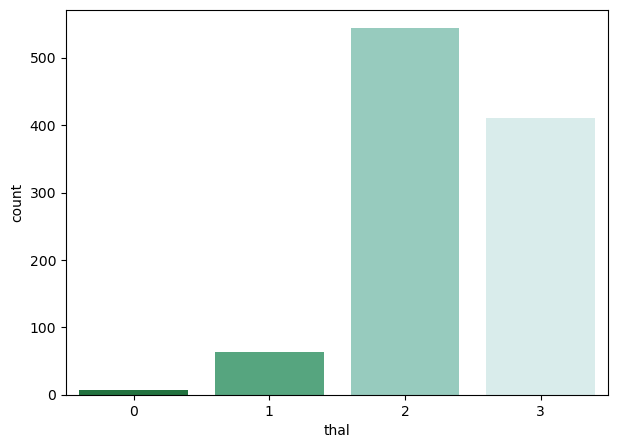

In [30]:
# counting no. of patients affected with thal
plt.figure(figsize=(7, 5))
sn.countplot(x='thal', data=disease_df,
			palette="BuGn_r")
plt.show()


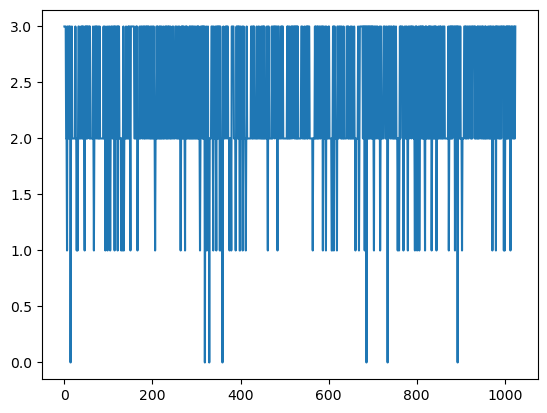

In [31]:
laste = disease_df['thal'].plot() #je comprends pas qu'est que se passe, mais on continue paraillement
plt.show(laste)

### normalization of data set
1. info
2. normalization 
2. splitting of dataset into training and test set

In [32]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   restecg   1025 non-null   int64  
 6   thalach   1025 non-null   int64  
 7   oldpeak   1025 non-null   float64
 8   slope     1025 non-null   int64  
 9   Calcium   1025 non-null   int64  
 10  thal      1025 non-null   int64  
 11  target    1025 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 96.2 KB


In [37]:
X = np.asarray(disease_df[['age', 'sex', 'cp','trestbps', 'chol', 
                           'restecg','thalach','oldpeak','slope','Calcium', 'thal',
                        ]])
y = np.asarray(disease_df['target'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
		X, y, test_size = 0.3, random_state = 4)


print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)


Train set: (717, 11) (717,)
Test set: (308, 11) (308,)


### modelling of  dataset for evaluation and accuracy:
1. used jaccard_score 
2. documentation for classification of jaccard score- https://scikit-learn.org/stable/auto_examples/multioutput/plot_classifier_chain_yeast.html#sphx-glr-auto-examples-multioutput-plot-classifier-chain-yeast-py

In [40]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluation and accuracy
from sklearn.metrics import jaccard_score

print('')
print('Accuracy of the model in jaccard similarity score is = ',
	jaccard_score(y_test, y_pred))



Accuracy of the model in jaccard similarity score is =  0.7621621621621621


### Applying Random Forest Classifier | Evaluation and Accuracy:


In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

score = rf.score(X_test,y_test)*100
print('Accuracy of the model is = ', score)


Accuracy of the model is =  99.02597402597402


### Finding the accuracy of the model using confusion matrix
1. import confusion matrix
2. why data is in cm? 
2. fmt = 'd', cmap= 'Greens'- check for other colors that are available 


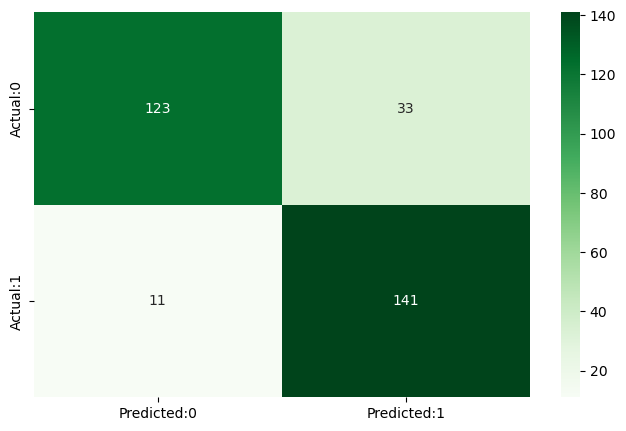

The details for confusion matrix are =
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       156
           1       0.81      0.93      0.87       152

    accuracy                           0.86       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308



In [44]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
						columns = ['Predicted:0', 'Predicted:1'],
						index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()

print('The details for confusion matrix are =')
print (classification_report(y_test, y_pred))

# This code is contributed by parna_28
